In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl

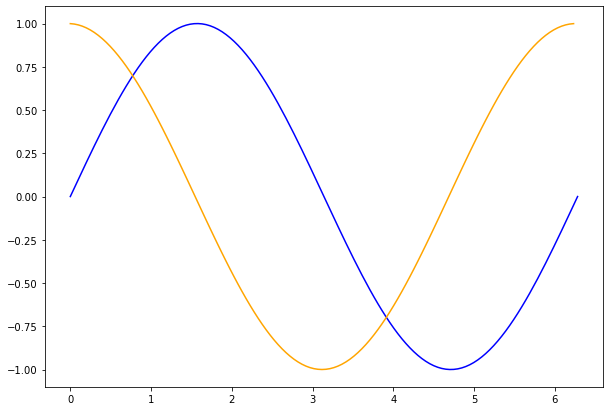

In [2]:
# Define the number of points in our space, N
N = 128
a = 2*np.pi

# Define the x space from 0 to a with N-1 divisions.
# Pythonは n=0!! から n=N-1!!まで
x = np.linspace(0, 2*np.pi, N)

# We want to store step size, this is the reliable way:
h = x[1] - x[0] # Should be equal to 2*np.pi/(N-1)

# Compute the function, y = sin(x). With numpy, this is easy:
y = np.sin(x)

# We compute the matrix using the np.diag(np.ones(N), 0) which creates a
# diagonal matrix of 1 of N×N size. Multiply by -1 to get -1 diagonal array.
# You get an +1 off-diagonal array of ones, with np.diag(np.ones(N-1), 1)
# Note that you need N-1 for an N×N array, since the off diagonal is one smaller.
# 一段下にずらすから、１で埋めるのは(0番目から、)N-1番目の成分だけ
# Add the two together and normalize by 1/h
Md = 1/h*(np.diag(-1*np.ones(N), 0) + np.diag(np.ones(N-1), 1))

# Compute the derivative of y into yp by matrix multiplication:
yp = Md.dot(y)

#Plot the results.
plt.figure(figsize = (10, 7))
plt.plot(x, y, color = "blue")
plt.plot(x[0:-1], yp[0:-1], color = "orange") # Don't plot last value, which is invalid
plt.show()


[[-817.10468548  408.55234274    0.         ...    0.
     0.            0.        ]
 [ 408.55234274 -817.10468548  408.55234274 ...    0.
     0.            0.        ]
 [   0.          408.55234274 -817.10468548 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ... -817.10468548
   408.55234274    0.        ]
 [   0.            0.            0.         ...  408.55234274
  -817.10468548  408.55234274]
 [   0.            0.            0.         ...    0.
   408.55234274 -817.10468548]]


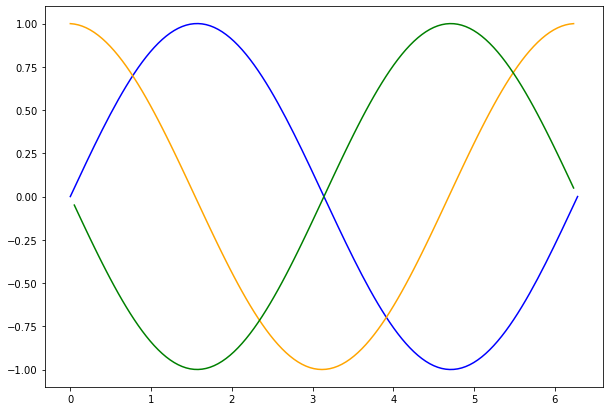

In [3]:
Mdd = 1/(h*h)*(np.diag(np.ones(N-1), -1) + np.diag(-2*np.ones(N), 0) + np.diag(np.ones(N-1), 1))
print(Mdd)

ypp = Mdd.dot(y)

plt.figure(figsize = (10, 7))
plt.plot(x, y, color = "blue")
plt.plot(x[0:-1], yp[0:-1], color = "orange") # Last value is invalid, don't plot
plt.plot(x[1:-1], ypp[1:-1], color = "green") # First and last value is invalid.
plt.show()


In [70]:
hbar = 1
m = 1
N = 512
a = 1

x = np.linspace(-a/2, a/2, N)

# We want to store step size, this is the reliable way:
h = x[1] - x[0] # Should be equal to 2*np.pi/(N-1)
V = 0*x
Mdd = 1/(h*h)*(np.diag(np.ones(N-1), -1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1))

H = -(hbar*hbar)/(2*m)*Mdd + np.diag(V)
E, psi = np.linalg.eigh(H) # This computes the eigen values and eigenvectors
psiT = np.transpose(psi) # We take the transpose of psi to the wavefunction vectors can accessed as psi[n]
print(Mdd)
print(H)

# My Question: How did the eigenstates work, even though we didn't give the boundary condition?
# Where's the arbitrary constants gone?

[[-522242.  261121.       0. ...       0.       0.       0.]
 [ 261121. -522242.  261121. ...       0.       0.       0.]
 [      0.  261121. -522242. ...       0.       0.       0.]
 ...
 [      0.       0.       0. ... -522242.  261121.       0.]
 [      0.       0.       0. ...  261121. -522242.  261121.]
 [      0.       0.       0. ...       0.  261121. -522242.]]
[[ 261121.  -130560.5       0.  ...       0.        0.        0. ]
 [-130560.5  261121.  -130560.5 ...       0.        0.        0. ]
 [      0.  -130560.5  261121.  ...       0.        0.        0. ]
 ...
 [      0.        0.        0.  ...  261121.  -130560.5       0. ]
 [      0.        0.        0.  ... -130560.5  261121.  -130560.5]
 [      0.        0.        0.  ...       0.  -130560.5  261121. ]]


In [71]:
psiT[0]

array([-0.00038237, -0.00076473, -0.00114706, -0.00152934, -0.00191157,
       -0.00229373, -0.0026758 , -0.00305777, -0.00343963, -0.00382135,
       -0.00420294, -0.00458436, -0.00496562, -0.00534669, -0.00572755,
       -0.00610821, -0.00648863, -0.00686881, -0.00724873, -0.00762838,
       -0.00800775, -0.00838681, -0.00876556, -0.00914398, -0.00952206,
       -0.00989978, -0.01027713, -0.01065409, -0.01103066, -0.01140681,
       -0.01178253, -0.01215782, -0.01253264, -0.012907  , -0.01328087,
       -0.01365424, -0.0140271 , -0.01439944, -0.01477123, -0.01514247,
       -0.01551315, -0.01588324, -0.01625273, -0.01662162, -0.01698988,
       -0.01735751, -0.01772448, -0.01809079, -0.01845643, -0.01882136,
       -0.0191856 , -0.01954911, -0.01991189, -0.02027393, -0.0206352 ,
       -0.0209957 , -0.02135541, -0.02171433, -0.02207242, -0.02242969,
       -0.02278612, -0.0231417 , -0.0234964 , -0.02385023, -0.02420316,
       -0.02455518, -0.02490628, -0.02525645, -0.02560567, -0.02

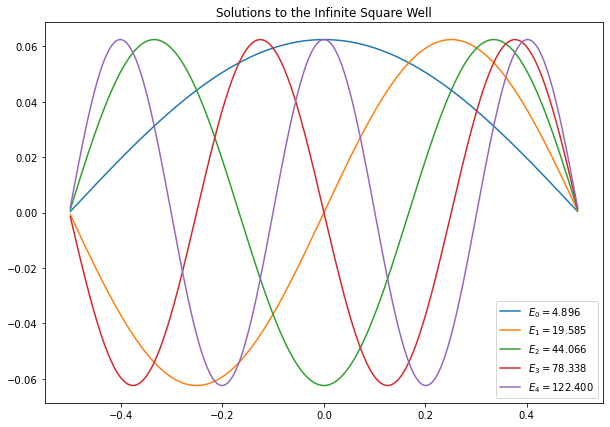

In [72]:
plt.figure(figsize = (10, 7))
for i in range(5):
    if psiT[i][N-10] < 0: # Flip the wavefunctions if it is negative at large x, so plots are more consistent.
        #ただ単に右側の関数系を揃えただけ
        plt.plot(x, -psiT[i], label = f"$E_{i} = {E[i]:>8.3f}$") #:>8.3f →上8桁下3桁まで表示！！
    else:
        plt.plot(x, psiT[i], label = f"$E_{i} = {E[i]:>8.3f}$")
    plt.title("Solutions to the Infinite Square Well")
plt.legend()
plt.savefig("Infinite_Square_Well_Wavefunction.pdf")
plt.show()

In [63]:
psiT[3][0]

0.0005585297985864509

In [34]:
for i in range(7):
    n = i + 1
    Delta = E[i] - n*n*np.pi**2*hbar*hbar/(2*m*a*a) #誤差
    print(f"E[{n}] = {E[i]:9.4f}, E_{n} = {n*n*np.pi**2*hbar*hbar/(2*m*a*a):9.4f}, Delta = {Delta:8.4f} ({1- Delta:<7.3f} %)")

E[1] =    4.8964, E_1 =    4.9348, Delta =  -0.0384 (1.038   %)
E[2] =   19.5854, E_2 =   19.7392, Delta =  -0.1539 (1.154   %)
E[3] =   44.0664, E_3 =   44.4132, Delta =  -0.3469 (1.347   %)
E[4] =   78.3385, E_4 =   78.9568, Delta =  -0.6184 (1.618   %)
E[5] =  122.4004, E_5 =  123.3701, Delta =  -0.9696 (1.970   %)
E[6] =  176.2505, E_6 =  177.6529, Delta =  -1.4023 (2.402   %)
E[7] =  239.8868, E_7 =  241.8053, Delta =  -1.9185 (2.918   %)


In [59]:
# Check the normalization condition
for j in range(5):
    for i in range(5):
        print(f"{np.sum(psiT[j]*psiT[i]) :16.9f}")
    print()

     1.000000000
     0.000000000
    -0.000000000
    -0.000000000
     0.000000000

     0.000000000
     1.000000000
    -0.000000000
    -0.000000000
     0.000000000

    -0.000000000
    -0.000000000
     1.000000000
     0.000000000
    -0.000000000

    -0.000000000
    -0.000000000
     0.000000000
     1.000000000
     0.000000000

     0.000000000
     0.000000000
    -0.000000000
     0.000000000
     1.000000000

